<a href="https://colab.research.google.com/github/vvthakral/data-science-bootcamp/blob/main/week-5-ml/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#basic imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
#load file
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train (1).csv


In [7]:
#read file into df
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#make copy
titanic_copy = titanic.copy()

In [8]:
#describing non numeric columns
titanic.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F33            3
              ..
E31            1
A23            1
F38            1
B79            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#check if the dataset has the names of actors :P
titanic[titanic["Name"].str.contains("Jack")] #Dawson

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


In [11]:
#remove non useful columns
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [12]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#check for null values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
#replace null with mean
titanic.Age.fillna(titanic.Age.mean(),inplace=True)

In [15]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
titanic.shape

(891, 8)

In [17]:
#drop rows with null values
titanic.dropna(inplace=True)
titanic.shape

(889, 8)

Text(0, 0.5, 'Passenger Count')

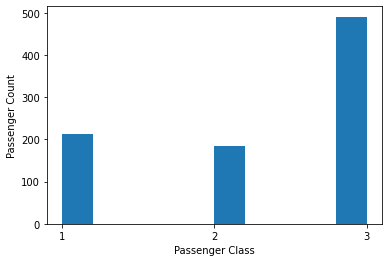

In [18]:
#Basic plotting.
plt.hist(titanic['Pclass'])
plt.xticks(titanic.Pclass.unique())
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')

In [19]:
#Analysis of the relation between sex and survived features
titanic.groupby(['Sex','Survived']).count()

Pclass  Age  SibSp  Parch  Fare  Embarked
Sex    Survived                                           
female 0             81   81     81     81    81        81
       1            231  231    231    231   231       231
male   0            468  468    468    468   468       468
       1            109  109    109    109   109       109

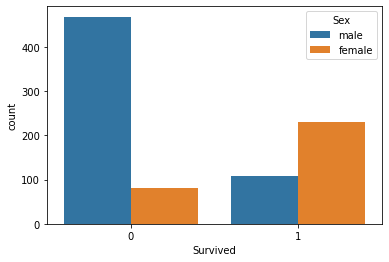

In [20]:
#In the form of plot
sns.countplot(x='Survived', hue='Sex', data=titanic)

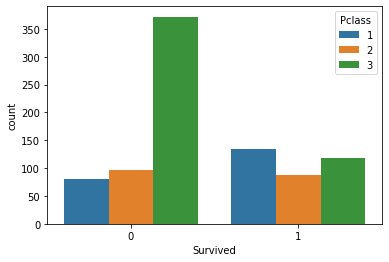

In [21]:
#Relation between Class and if the person survived
sns.countplot(x='Survived', hue='Pclass', data=titanic)

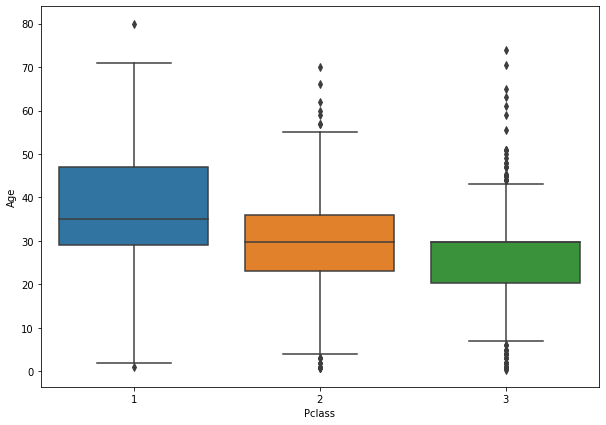

In [19]:
#Age groups of different classes
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [ ]:
titanic = titanic_copy.copy()

In [23]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [24]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(titanic['Embarked'])
le.transform(titanic['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

In [25]:
#count of individual in each category
titanic.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [26]:
#apply function / basic Label Encoder
titanic.Sex = titanic.Sex.apply(lambda x:0 if x=='female' else 1)
titanic.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [27]:
#Pandas get_dummies
sex = pd.get_dummies(titanic["Sex"],drop_first= True,prefix='Sex')
embarked = pd.get_dummies(titanic["Embarked"],drop_first=True,prefix='Embarked')

In [25]:
titanic.Pclass.dtype

dtype('int64')

In [28]:
embarked

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [29]:
#add columns
titanic = pd.concat([titanic,embarked,sex],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S,Sex_1
0,0,3,1,22.0,1,0,7.2500,S,0,1,1
1,1,1,0,38.0,1,0,71.2833,C,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,1,0
4,0,3,1,35.0,0,0,8.0500,S,0,1,1


In [30]:
#drop original columns
titanic.drop(["Sex","Embarked"],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_1
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [31]:
#Create test and train datasets
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =7)

Question. Can you do the same thing without creating X and y?

In [33]:
print(X_train.shape)

(711, 8)


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logisticR = LogisticRegression(max_iter=200)
logisticR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#help(logisticR)

In [37]:
y_pred = logisticR.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



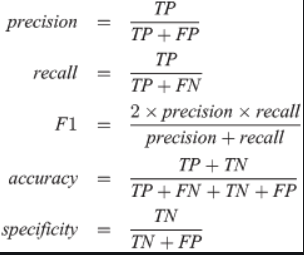

Q. For a reliable model what should be high if we are trying to predict that someone might have cancer?

In [38]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[88, 21],
       [20, 49]])

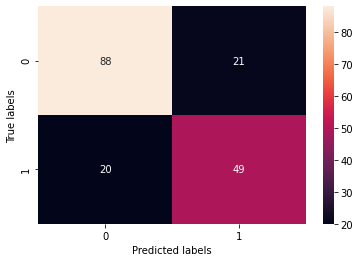

In [39]:
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

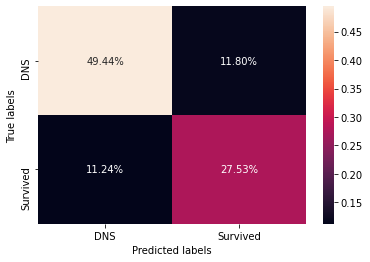

In [40]:
ax = plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['DNS', 'Survived']); ax.yaxis.set_ticklabels(['DNS', 'Survived']);

In [ ]:
#load the actual test data

In [41]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [42]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test_copy = test.copy()
pd.get_dummies(data=test_copy, columns=['Sex', 'Embarked'],drop_first=True,prefix=['Sex','Embarked'])

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,1,0,1


In [45]:
def prep_data(x):
  x.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
  x.Age.fillna(x.Age.mean(),inplace=True)
  x.Fare.fillna(x.Fare.mean(),inplace=True)
  x = pd.get_dummies(data=x, columns=['Sex', 'Embarked'],drop_first=True,prefix=['Sex','Embarked'])
  return x
  
result_df = pd.DataFrame(test.PassengerId)
test = prep_data(test)
print(test.shape)
test.head()

(418, 8)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [46]:
predictions = logisticR.predict(test)
print(predictions)

[1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 1 1 0 0 1 0 0 1]


In [47]:
result_df['Survived'] = predictions
result_df.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0


In [48]:
result_df.to_csv("submit.csv",index=False)

**Questions**

Try the prediction making without the Embarked column.

Also see the result by dropping Fare column as we have the P_class category to handle fare.

Will you observe any change by encoding the Pclass category?